# Assignment 3
Jan Widanka

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.linalg import solve_triangular
from scipy import sparse, linalg
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

## Black-Scholes formula

In [4]:
def payoff(X, K, call=True):
    if call:
        return np.maximum((X - K), 0)
    else:
        return np.maximum((K - X), 0)

In [5]:
def v_price(X, K, r, sigma, T, t, call=True):
    d_1 = (np.log(X / K) + (r + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t))
    d_2 = d_1 - sigma * np.sqrt(T - t)
    if call:
        price = X * stats.norm.cdf(d_1) - K * np.exp(-r * (T - t)) * stats.norm.cdf(d_2)
    else:
        price = K * np.exp(-r * (T-t)) * stats.norm.cdf(-d_2) - X * stats.norm.cdf(-d_1)

    return price

## Finite difference schemes

### Explicit finite-difference method

In [336]:
def find_option_value(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def bs_explicit(K, r, sigma, T, S_max, S_0, n, m, option_type):
    dt = T / n
    
    dS = S_max / m
    
    S = np.linspace(0, S_max, m+1)
    
    grid = np.zeros((m + 1, n + 1))
    
    if option_type == 'call': #BC's for call option
        grid[:, n] = np.maximum(S - K, 0)
        grid[0, :] = 0
        grid[m, :] = S_max - K * np.exp(-r * (n - np.arange(n + 1)) * dt)
        
    if option_type == 'put': #BC's for put option
        grid[0, :] = K * np.exp(-r * (n - np.arange(n + 1)) * dt)
        grid[m, :] = 0
        grid[:, n] = np.maximum(K - S, 0)
    
    for j in range(n-1, -1, -1):
        for i in range(1, m-1):
            a_i = 1 / (r * dt + 1) * (-0.5 * r * i * dt + 0.5 * sigma**2 * i**2 * dt)
            b_i = 1 / (r * dt + 1) * (1 - sigma**2 * i**2 * dt)
            c_i = 1 / (r * dt + 1) * (0.5 * r * i * dt + 0.5 * sigma**2 * i**2 * dt)
            grid[i, j] = a_i * grid[i - 1, j + 1] + b_i * grid[i, j + 1] + c_i * grid[i + 1, j + 1]
            
    i_index = find_option_value(S, S_0)
    option_value_approx_S0 = grid[i_index, 0]
            
    return option_value_approx_S0

In [337]:
K = 100
r = 0.05
sigma = 0.2
T = 1
S_max = 300
m = 30
S_0 = 100
n_values = np.arange(5, 100, 1)

In [338]:
call_option_value = [bs_explicit(K, r, sigma, T, S_max, S_0, n, m, 'call') for n in n_values]
bs_price = v_price(S_0, K, r, sigma, T, 0, call=True)

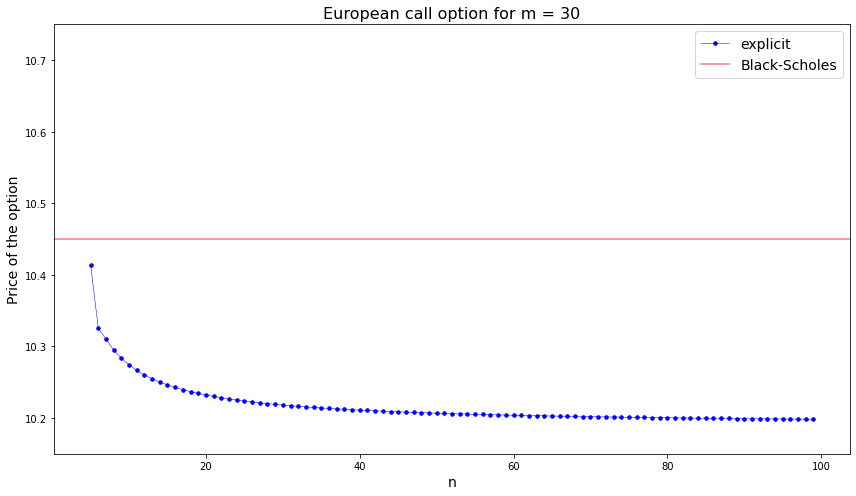

In [339]:
plt.figure(figsize=(12,7))
plt.plot(n_values, call_option_value, label='explicit', marker='.', lw=0.5, markersize=7, color='blue')
plt.axhline(y=bs_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European call option for m = 30', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(10.15, 10.75)
plt.tight_layout()
plt.show()

### European call for different m

In [340]:
m = 60
call_option_value_m_60 = [bs_explicit(K, r, sigma, T, S_max, S_0, n, m, 'call') for n in n_values]

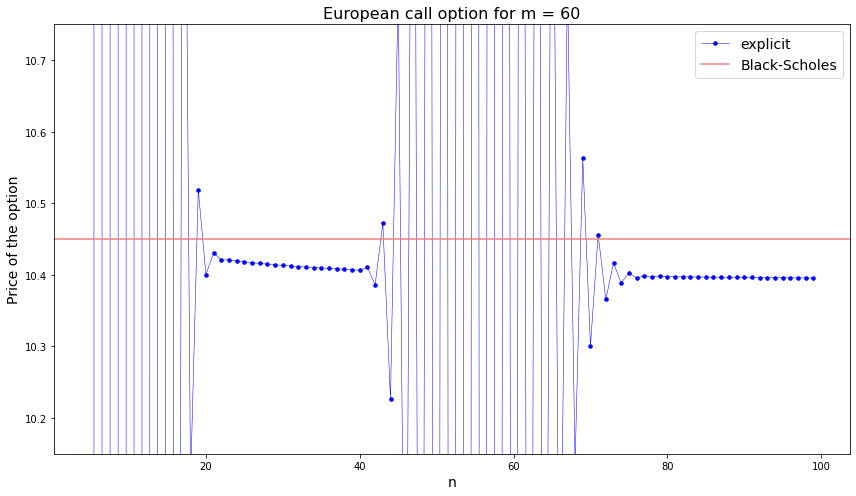

In [341]:
plt.figure(figsize=(12,7))
plt.plot(n_values, call_option_value_m_60, label='explicit', marker='.', lw=0.5, markersize=7, color='blue')
plt.axhline(y=bs_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European call option for m = 60', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(10.15, 10.75)
plt.tight_layout()
plt.show()

### m = 120

In [342]:
m = 120
call_option_value_m_120 = [bs_explicit(K, r, sigma, T, S_max, S_0, n, m, 'call') for n in n_values]

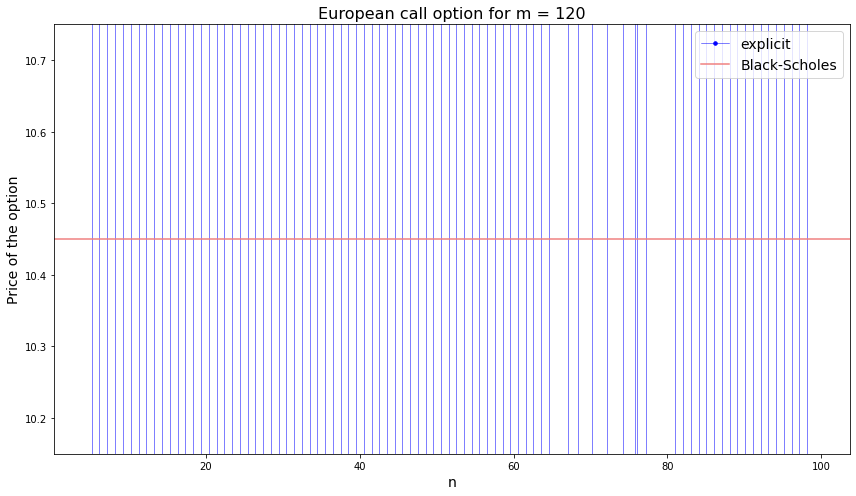

In [343]:
plt.figure(figsize=(12,7))
plt.plot(n_values, call_option_value_m_120, label='explicit', marker='.', lw=0.5, markersize=7, color='blue')
plt.axhline(y=bs_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European call option for m = 120', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(10.15, 10.75)
plt.tight_layout()
plt.show()

### Put option

In [344]:
m = 30
put_option_value = [bs_explicit(K, r, sigma, T, S_max, S_0, n, m, 'put') for n in n_values]
bs_put_price = v_price(S_0, K, r, sigma, T, 0, call=False)

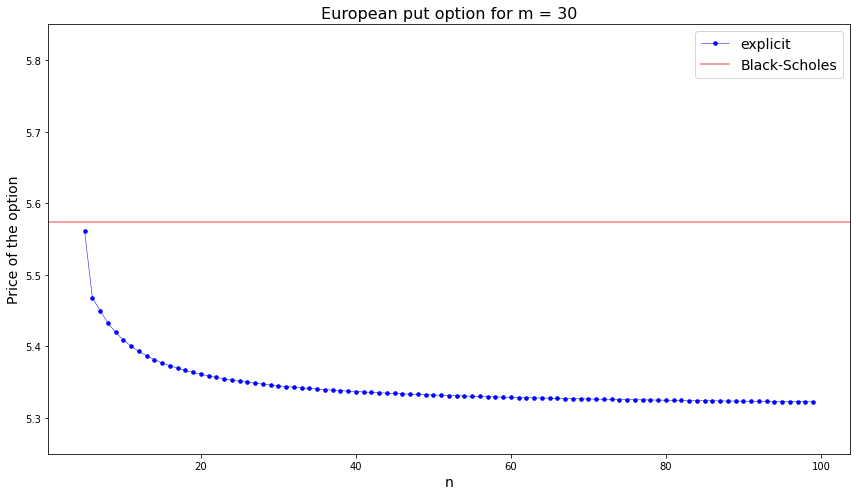

In [345]:
plt.figure(figsize=(12,7))
plt.plot(n_values, put_option_value, label='explicit', marker='.', lw=0.5, markersize=7, color='blue')
plt.axhline(y=bs_put_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European put option for m = 30', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(5.25, 5.85)
plt.tight_layout()
plt.show()

### Results for different m

In [346]:
m = 60
put_option_value_m_60 = [bs_explicit(K, r, sigma, T, S_max, S_0, n, m, 'put') for n in n_values]

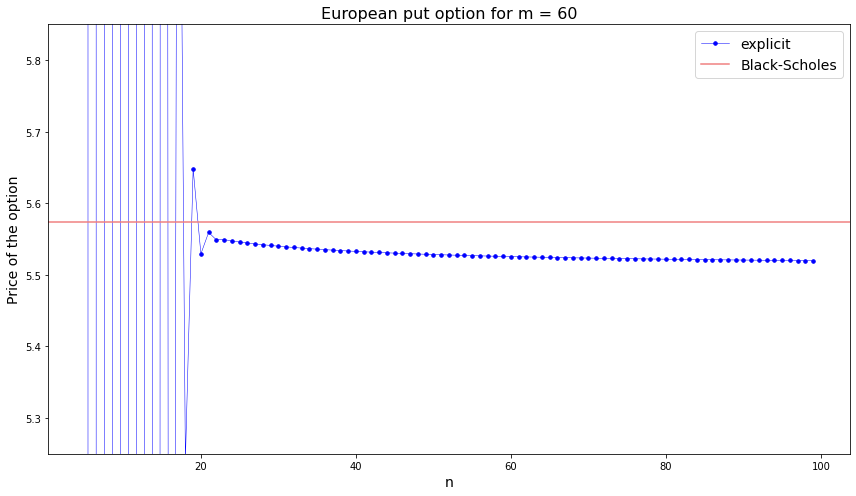

In [347]:
plt.figure(figsize=(12,7))
plt.plot(n_values, put_option_value_m_60, label='explicit', marker='.', lw=0.5, markersize=7, color='blue')
plt.axhline(y=bs_put_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European put option for m = 60', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(5.25, 5.85)
plt.tight_layout()
plt.show()

### m = 120

In [348]:
m = 120
put_option_value_m_120 = [bs_explicit(K, r, sigma, T, S_max, S_0, n, m, 'put') for n in n_values]

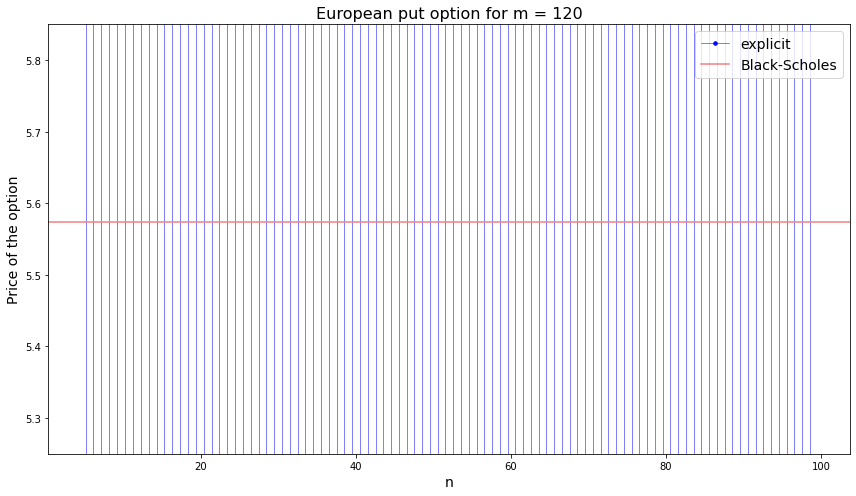

In [349]:
plt.figure(figsize=(12,7))
plt.plot(n_values, put_option_value_m_120, label='explicit', marker='.', lw=0.5, markersize=7, color='blue')
plt.axhline(y=bs_put_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European put option for m = 120', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(5.25, 5.85)
plt.tight_layout()
plt.show()

### Implicit finite-difference method - does not work

In [165]:
def implicit_finite_difference(S0, S_max, K, T, r, sigma, m, n, option_type):
    dt = T / n
    ds = S_max / m
    
    S = np.linspace(0, S_max, m+1)
    
    grid = np.zeros((m+1, n+1))
    
    if option_type == 'call':
        grid[:, n] = np.maximum(S - K, 0)
        grid[0, :] = 0
        grid[m, :] = S_max - K * np.exp(-r * (n - np.arange(n + 1)) * dt)
    elif option_type == 'put':
        grid[:, n] = np.maximum(K - S, 0)
        grid[0, :] = K * np.exp(-r * (n - np.arange(n + 1)) * dt)
        grid[m, :] = 0

    a = -0.5 * dt * (sigma**2 * (np.arange(m + 1)**2) - r * np.arange(m + 1))
    b = 1 + dt * (sigma**2 * (np.arange(m + 1)**2) + r)
    c = -0.5 * dt * (sigma**2 * (np.arange(m + 1)**2) + r * np.arange(m + 1))

    A = np.diag(-a[2:m], k=-1) + np.diag(1 + b[1:m]) + np.diag(-c[1:m-1], k=1)
    
    for j in range(n-1, -1, -1):
        l = np.zeros(m - 1)
        l[0] = a[1] * grid[0][j+1]
        l[-1] = c[m-1] * grid[m][j+1]
        b_m = grid[1:m, j] - l
        
        grid[1:m, j] = np.linalg.solve(A, b_m)

    option_value = np.interp(S0, S, grid[:, 0])

    return option_value

In [166]:
K = 100
r = 0.05
sigma = 0.2
T = 1
S_max = 3 * S_0
m = 60
S_0 = 100
n_values = np.arange(5, 100, 1)

In [167]:
implicit_call_m_30 = [implicit_finite_difference(S_0, S_max, K, T, r, sigma, m, n, 'call') for n in n_values]

### Implicit different approach

In [307]:
def implicit_finite(X0, sigma, K, Texpir, m, n, option_type):

    S_max = 3 * float(K)
    S_min = float(K) / 3
    
    x_max = np.log(S_max) 
    x_min = np.log(S_min) 
    
    x, dx = np.linspace(x_min, x_max, m, retstep=True)
    T, dt = np.linspace(0, Texpir, n, retstep=True)

    V = np.zeros((m, n))
    offset = np.zeros(m - 2)
    
    if option_type == 'call':
        V[:, -1] = np.maximum(np.exp(x) - K, 0)
        V[-1, :] = np.exp(x_max) - K * np.exp(-r * T[::-1])
        V[0, :] = 0
    if option_type == 'put':
        V[:, -1] = np.maximum(K - np.exp(x), 0)
        V[-1, :] = 0
        V[0, :] = K * np.exp(-r * T[::-1])
        

    a = (dt / 2) * ((r - 0.5 * sigma**2) / dx - sigma**2 / dx**2)
    b = 1 + dt * (sigma**2 / dx**2 + r)
    c = -(dt / 2) * ((r - 0.5 * sigma**2) / dx + sigma**2 / dx**2)

    A = diags([a, b, c], [-1, 0, 1], shape=(m - 2, m - 2)).tocsc()

    for j in range(n - 2, -1, -1):
        offset[0] = a * V[0, j]
        offset[-1] = c * V[-1, j]
        V[1:-1, j] = spsolve(A, (V[1:-1, j + 1] - offset))

    option_value = np.interp(X0, x, V[:, 0])
    return option_value


In [308]:
S_0 = 100
K = 100
r = 0.05
sigma = 0.2
Texpir = 1
m = 30
X0 = np.log(S_0)
n_values = np.arange(5, 100, 1)

In [309]:
impl_call_m_30 = [implicit_finite(X0, sigma, K, Texpir, m, n, 'call') for n in n_values]

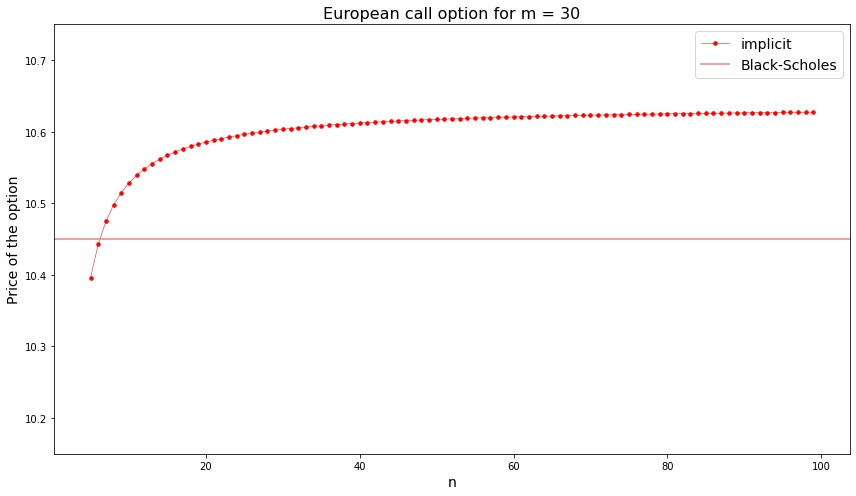

In [310]:
plt.figure(figsize=(12,7))
plt.plot(n_values, impl_call_m_30, label='implicit', marker='.', lw=0.5, markersize=7, color='red')
plt.axhline(y=bs_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European call option for m = 30', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(10.15, 10.75)
plt.tight_layout()
plt.show()

In [311]:
m = 60
impl_call_m_60 = [implicit_finite(X0, sigma, K, Texpir, m, n, 'call') for n in n_values]

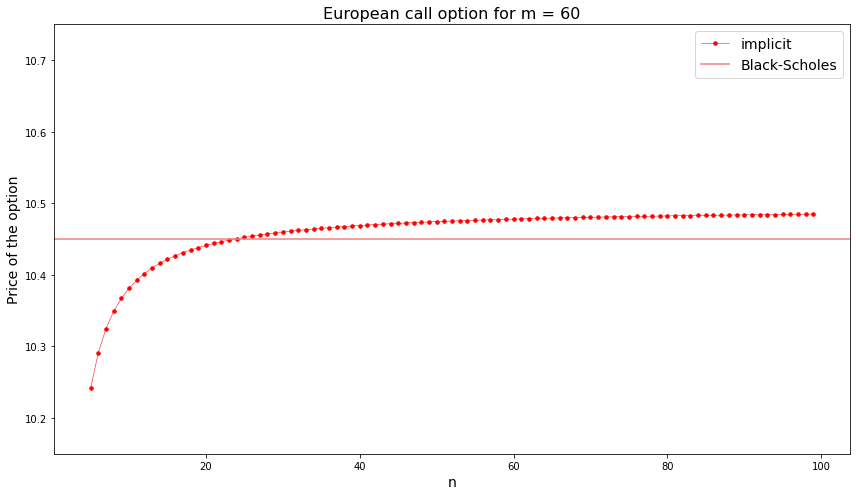

In [312]:
plt.figure(figsize=(12,7))
plt.plot(n_values, impl_call_m_60, label='implicit', marker='.', lw=0.5, markersize=7, color='red')
plt.axhline(y=bs_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European call option for m = 60', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(10.15, 10.75)
plt.tight_layout()
plt.show()

In [313]:
m = 120
impl_call_m_120 = [implicit_finite(X0, sigma, K, Texpir, m, n, 'call') for n in n_values]

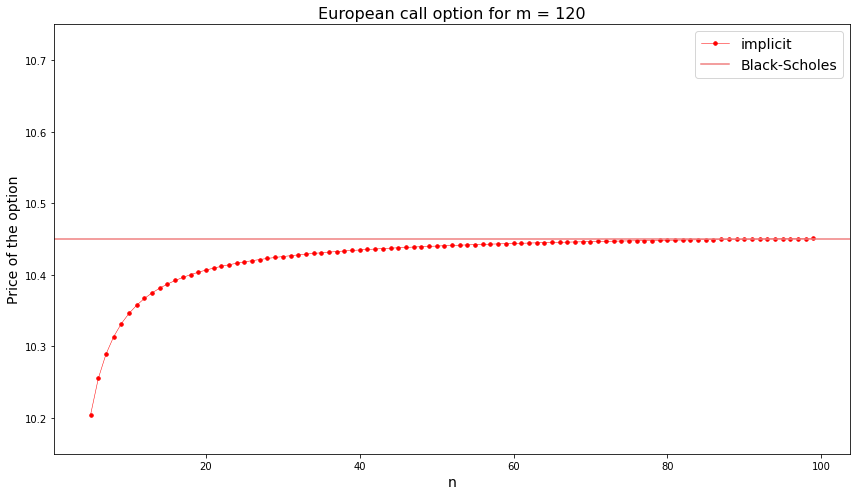

In [314]:
plt.figure(figsize=(12,7))
plt.plot(n_values, impl_call_m_120, label='implicit', marker='.', lw=0.5, markersize=7, color='red')
plt.axhline(y=bs_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European call option for m = 120', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(10.15, 10.75)
plt.tight_layout()
plt.show()

### European put option

In [315]:
m = 30
impl_put_m_30 = [implicit_finite(X0, sigma, K, Texpir, m, n, 'put') for n in n_values]

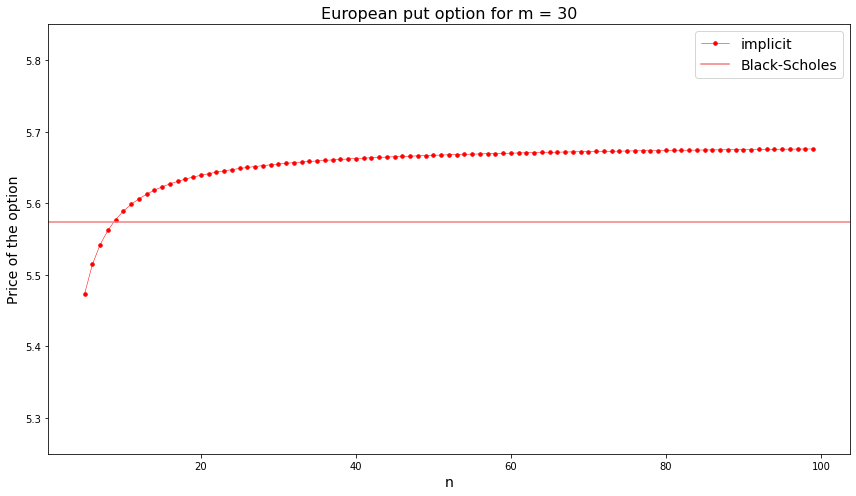

In [318]:
plt.figure(figsize=(12,7))
plt.plot(n_values, impl_put_m_30, label='implicit', marker='.', lw=0.5, markersize=7, color='red')
plt.axhline(y=bs_put_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European put option for m = 30', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(5.25, 5.85)
plt.tight_layout()
plt.show()

In [319]:
m = 60
impl_put_m_60 = [implicit_finite(X0, sigma, K, Texpir, m, n, 'put') for n in n_values]

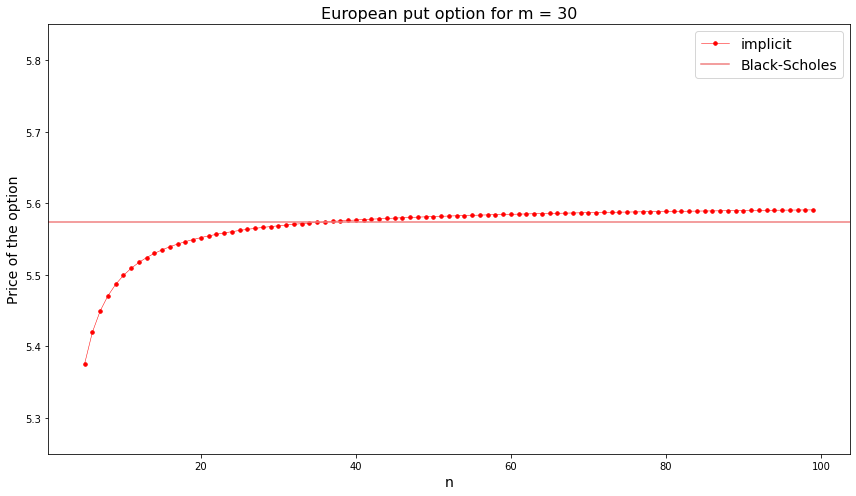

In [320]:
plt.figure(figsize=(12,7))
plt.plot(n_values, impl_put_m_60, label='implicit', marker='.', lw=0.5, markersize=7, color='red')
plt.axhline(y=bs_put_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European put option for m = 30', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(5.25, 5.85)
plt.tight_layout()
plt.show()

In [321]:
m = 120
impl_put_m_120 = [implicit_finite(X0, sigma, K, Texpir, m, n, 'put') for n in n_values]

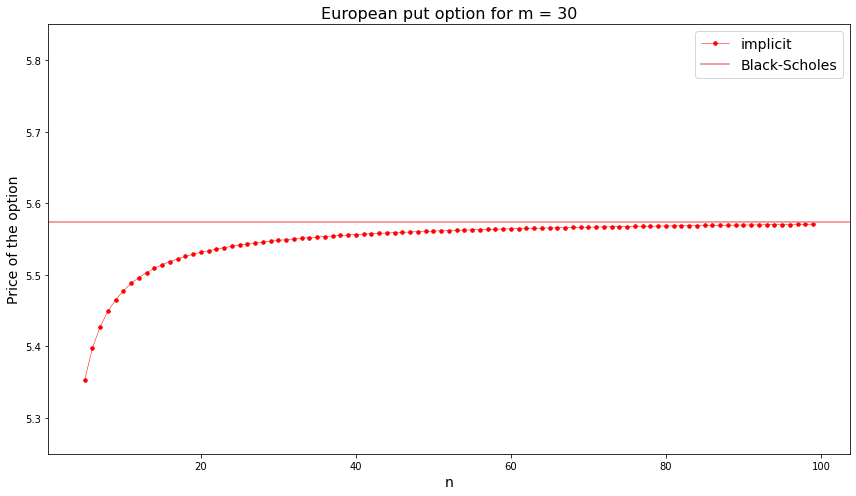

In [322]:
plt.figure(figsize=(12,7))
plt.plot(n_values, impl_put_m_120, label='implicit', marker='.', lw=0.5, markersize=7, color='red')
plt.axhline(y=bs_put_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European put option for m = 30', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(5.25, 5.85)
plt.tight_layout()
plt.show()

## Crank-Nicholson

In [357]:
def crank_nicholson(S0, S_max, K, T, r, sigma, m, n, option_type):
    dt = T / n
    ds = S_max / m
    
    S = np.linspace(0, S_max, m + 1)
    ts = np.linspace(0, T, n + 1)

    grid = np.zeros((m + 1, n + 1))
    
    if option_type == 'call':
        grid[:, n] = np.maximum(S - K, 0)
        grid[0, :] = 0
        grid[m, :] = S_max - K * np.exp(-r * (n - np.arange(n + 1)) * dt)
    if option_type == 'put':
        grid[:, n] = np.maximum(K - S, 0)
        grid[0, :] = K * np.exp(-r * (n - np.arange(n + 1)) * dt)
        grid[m, :] = 0

    a = 0.25 * dt * (sigma**2 * (np.arange(m + 1)**2) - r * np.arange(m + 1))
    b = -dt * 0.5 * (sigma**2 * (np.arange(m + 1)**2) + r)
    c = 0.25 * dt * (sigma**2 * (np.arange(m + 1)**2) + r * np.arange(m + 1))

    L = np.diag(1 - b[1:m]) + np.diag(-a[2:m], k=-1) + np.diag(-c[1:m-1], k=1)
    D = np.diag(1 + b[1:m]) + np.diag(a[2:m], k=-1) + np.diag(c[1:m-1], k=1)

    for j in range(n - 1, -1, -1):
        l = np.zeros(m - 1)
        l[0] = a[1] * (grid[0, j] + grid[0, j+1])
        l[-1] = c[m-1] * (grid[m, j] + grid[m, j+1])
        grid[1:m, j] = np.linalg.solve(L, D @ grid[1:m, j+1] + l)

    idown = int(np.floor(S0 / ds))
    iup = int(np.ceil(S0 / ds))
    if idown == iup:
        option_value = grid[idown, 0]
    else:
        option_value = grid[idown, 0] + ((iup - (S0 / ds)) / (iup - idown)) * (grid[iup, 0] - grid[idown, 0])

    return option_value

### Results - European call option

In [358]:
T = 1
S_0 = 100
S_max = 3*S_0
K = 100
sigma = 0.2
r = 0.05
m = 30
n_vals = np.arange(5, 100, 1)

In [359]:
cran_nich_m_30_call = [crank_nicholson(S_0, S_max, K, T, r, sigma, m, n, 'call') for n in n_vals]

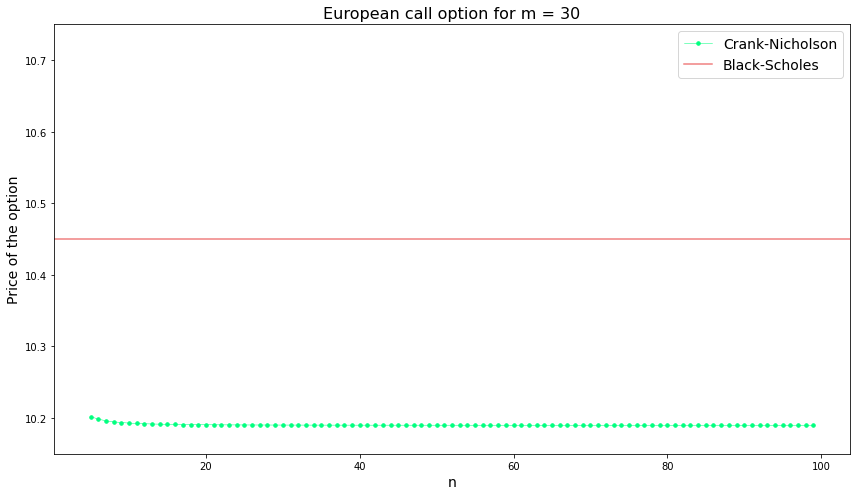

In [360]:
plt.figure(figsize=(12,7))
plt.plot(n_vals, cran_nich_m_30_call, label='Crank-Nicholson', marker='.', lw=0.5, markersize=7, color='springgreen')
plt.axhline(y=bs_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European call option for m = 30', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(10.15, 10.75)
plt.tight_layout()
plt.show()

### Different m

In [361]:
M = 60
cran_nich_m_60_call = [crank_nicholson(S_0, S_max, K, T, r, sigma, M, N, 'call') for N in n_vals]

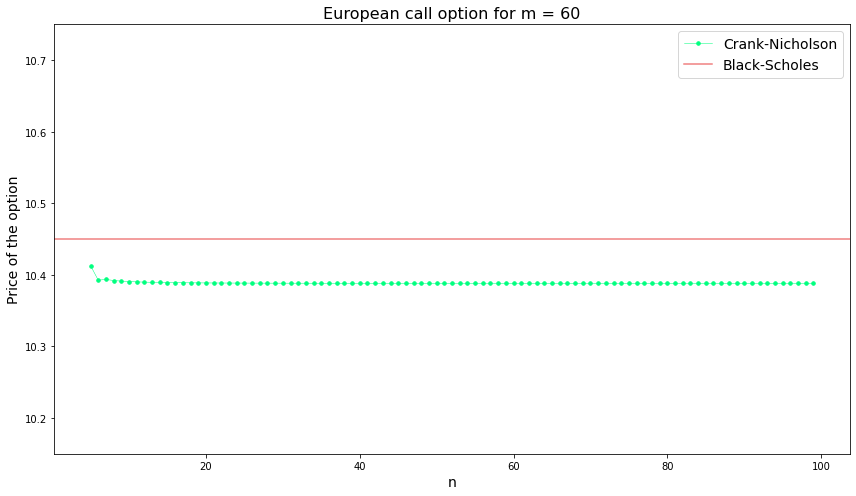

In [362]:
plt.figure(figsize=(12,7))
plt.plot(n_vals, cran_nich_m_60_call, label='Crank-Nicholson', marker='.', lw=0.5, markersize=7, color='springgreen')
plt.axhline(y=bs_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European call option for m = 60', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(10.15, 10.75)
plt.tight_layout()
plt.show()

In [363]:
M = 120
cran_nich_m_120_call = [crank_nicholson(S_0, S_max, K, T, r, sigma, M, N, 'call') for N in n_vals]

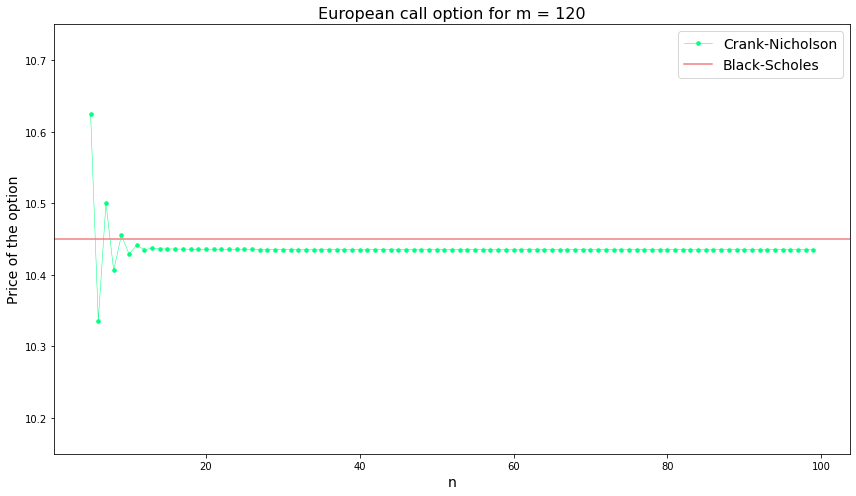

In [364]:
plt.figure(figsize=(12,7))
plt.plot(n_vals, cran_nich_m_120_call, label='Crank-Nicholson', marker='.', lw=0.5, markersize=7, color='springgreen')
plt.axhline(y=bs_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European call option for m = 120', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(10.15, 10.75)
plt.tight_layout()
plt.show()

In [365]:
M = 200
cran_nich_m_200_call = [crank_nicholson(S_0, S_max, K, T, r, sigma, M, N, 'call') for N in n_vals]

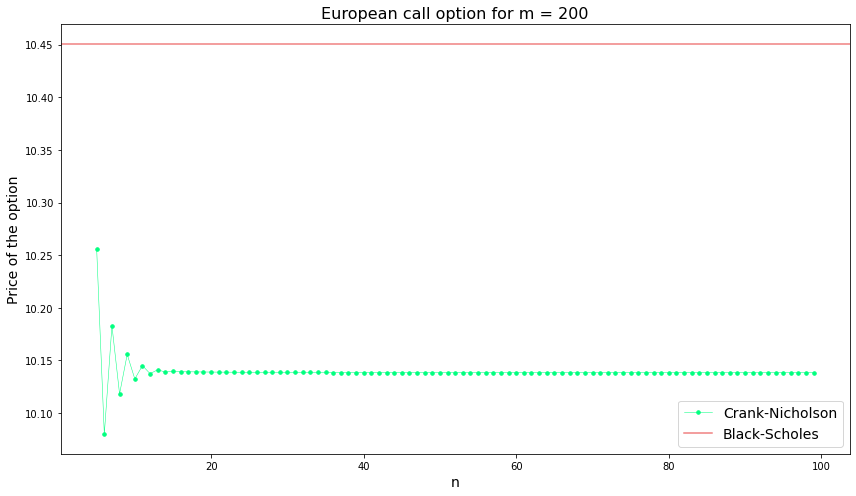

In [366]:
plt.figure(figsize=(12,7))
plt.plot(n_vals, cran_nich_m_200_call, label='Crank-Nicholson', marker='.', lw=0.5, markersize=7, color='springgreen')
plt.axhline(y=bs_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European call option for m = 200', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
#plt.ylim(10.15, 10.75)
plt.tight_layout()
plt.show()

### Put option

In [367]:
M = 30
cran_nich_m_30 = [crank_nicholson(S_0, S_max, K, T, r, sigma, M, N, 'put') for N in n_vals]

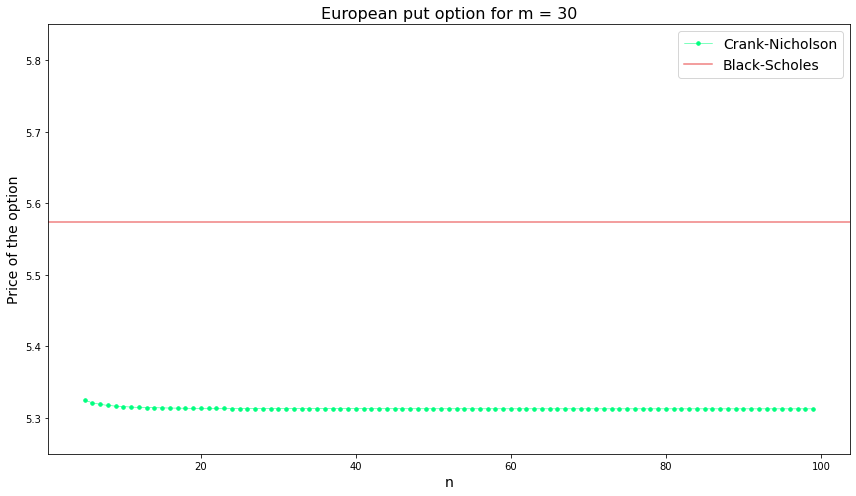

In [368]:
plt.figure(figsize=(12,7))
plt.plot(n_vals, cran_nich_m_30, label='Crank-Nicholson', marker='.', lw=0.5, markersize=7, color='springgreen')
plt.axhline(y=bs_put_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European put option for m = 30', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(5.25, 5.85)
plt.tight_layout()
plt.show()

### Different m

In [369]:
M = 60
cran_nich_m_60 = [crank_nicholson(S_0, S_max, K, T, r, sigma, M, N, 'put') for N in n_vals]

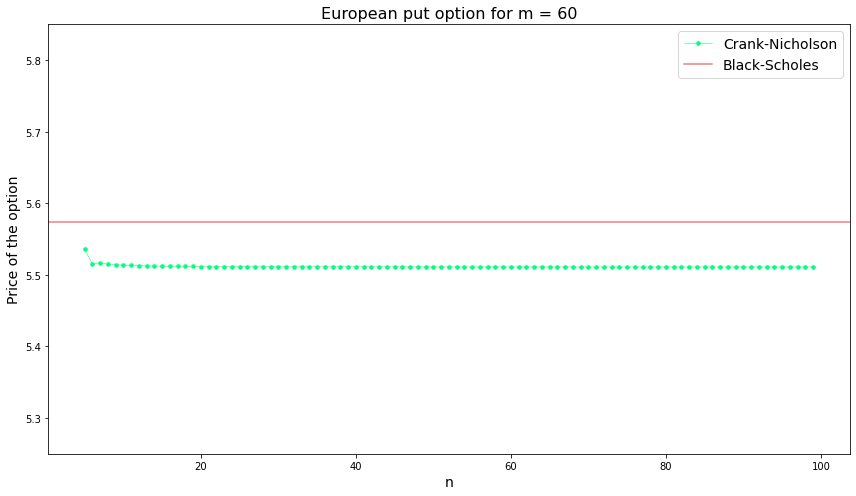

In [370]:
plt.figure(figsize=(12,7))
plt.plot(n_vals, cran_nich_m_60, label='Crank-Nicholson', marker='.', lw=0.5, markersize=7, color='springgreen')
plt.axhline(y=bs_put_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European put option for m = 60', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(5.25, 5.85)
plt.tight_layout()
plt.show()

In [371]:
M = 120
cran_nich_m_120 = [crank_nicholson(S_0, S_max, K, T, r, sigma, M, N, 'put') for N in n_vals]

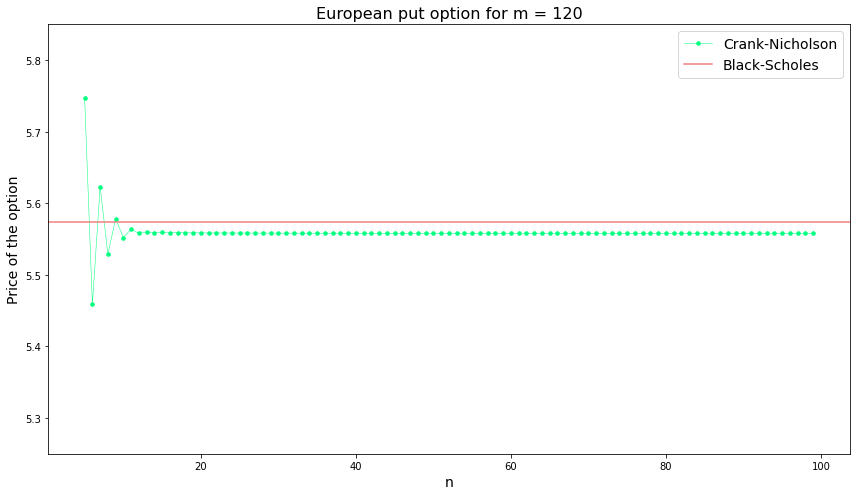

In [372]:
plt.figure(figsize=(12,7))
plt.plot(n_vals, cran_nich_m_120, label='Crank-Nicholson', marker='.', lw=0.5, markersize=7, color='springgreen')
plt.axhline(y=bs_put_price, color='lightcoral', linestyle='-', label='Black-Scholes')
plt.title('European put option for m = 120', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(5.25, 5.85)
plt.tight_layout()
plt.show()

### Results on one plot

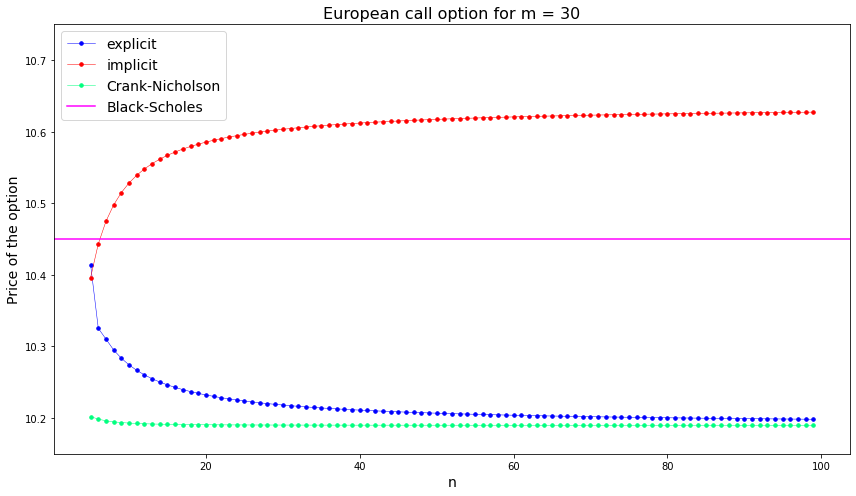

In [334]:
plt.figure(figsize=(12,7))
plt.plot(n_vals, call_option_value, label='explicit', marker='.', lw=0.5, markersize=7, color='blue')
plt.plot(n_vals, impl_call_m_30, label='implicit', marker='.', lw=0.5, markersize=7, color='red')
plt.plot(n_vals, cran_nich_m_30_call, label='Crank-Nicholson', marker='.', lw=0.5, markersize=7, color='springgreen')
plt.axhline(y=bs_price, color='fuchsia', linestyle='-', label='Black-Scholes')
plt.title('European call option for m = 30', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(10.15, 10.75)
plt.tight_layout()
plt.show()

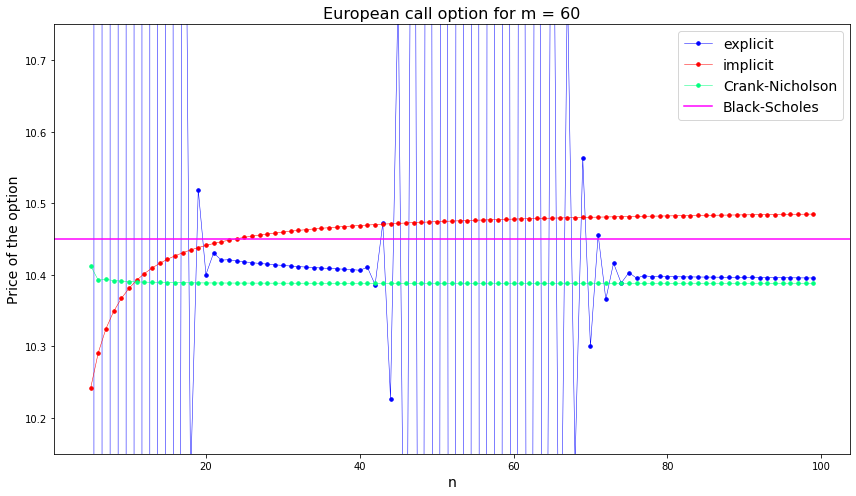

In [354]:
plt.figure(figsize=(12,7))
plt.plot(n_vals, call_option_value_m_60, label='explicit', marker='.', lw=0.5, markersize=7, color='blue')
plt.plot(n_vals, impl_call_m_60, label='implicit', marker='.', lw=0.5, markersize=7, color='red')
plt.plot(n_vals, cran_nich_m_60_call, label='Crank-Nicholson', marker='.', lw=0.5, markersize=7, color='springgreen')
plt.axhline(y=bs_price, color='fuchsia', linestyle='-', label='Black-Scholes')
plt.title('European call option for m = 60', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(10.15, 10.75)
plt.tight_layout()
plt.show()

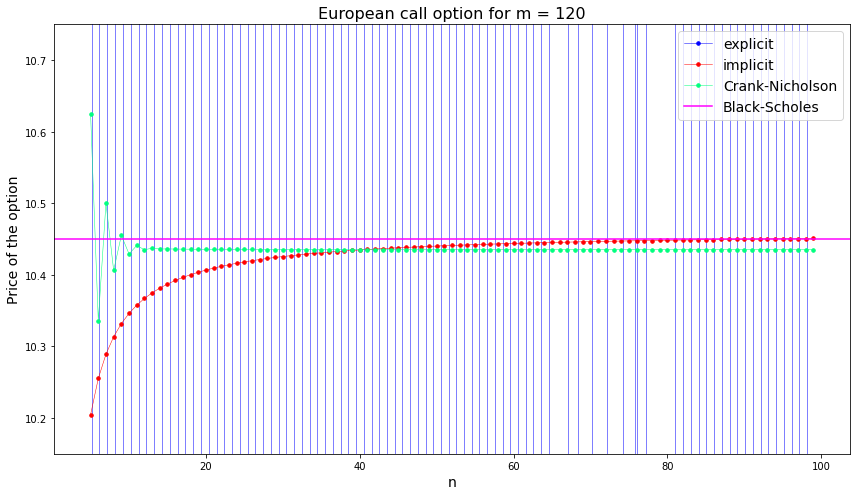

In [355]:
plt.figure(figsize=(12,7))
plt.plot(n_vals, call_option_value_m_120, label='explicit', marker='.', lw=0.5, markersize=7, color='blue')
plt.plot(n_vals, impl_call_m_120, label='implicit', marker='.', lw=0.5, markersize=7, color='red')
plt.plot(n_vals, cran_nich_m_120_call, label='Crank-Nicholson', marker='.', lw=0.5, markersize=7, color='springgreen')
plt.axhline(y=bs_price, color='fuchsia', linestyle='-', label='Black-Scholes')
plt.title('European call option for m = 120', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(10.15, 10.75)
plt.tight_layout()
plt.show()

### Put option

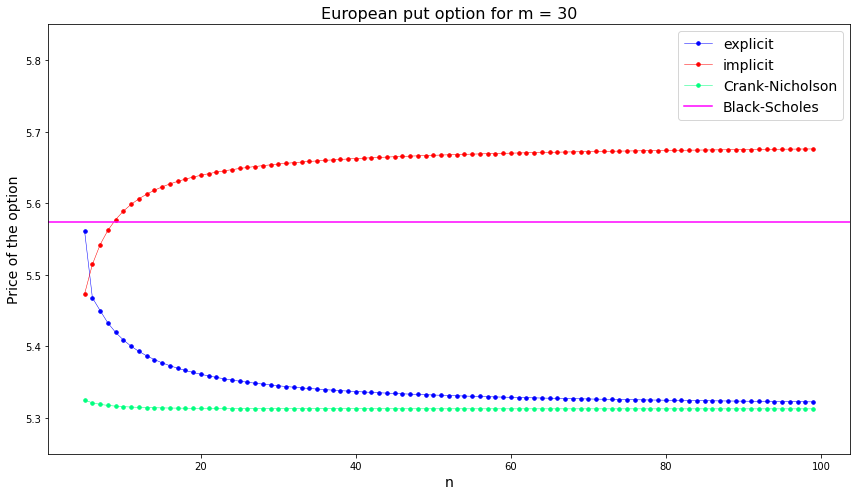

In [373]:
plt.figure(figsize=(12,7))
plt.plot(n_vals, put_option_value, label='explicit', marker='.', lw=0.5, markersize=7, color='blue')
plt.plot(n_vals, impl_put_m_30, label='implicit', marker='.', lw=0.5, markersize=7, color='red')
plt.plot(n_vals, cran_nich_m_30, label='Crank-Nicholson', marker='.', lw=0.5, markersize=7, color='springgreen')
plt.axhline(y=bs_put_price, color='fuchsia', linestyle='-', label='Black-Scholes')
plt.title('European put option for m = 30', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(5.25, 5.85)
plt.tight_layout()
plt.show()

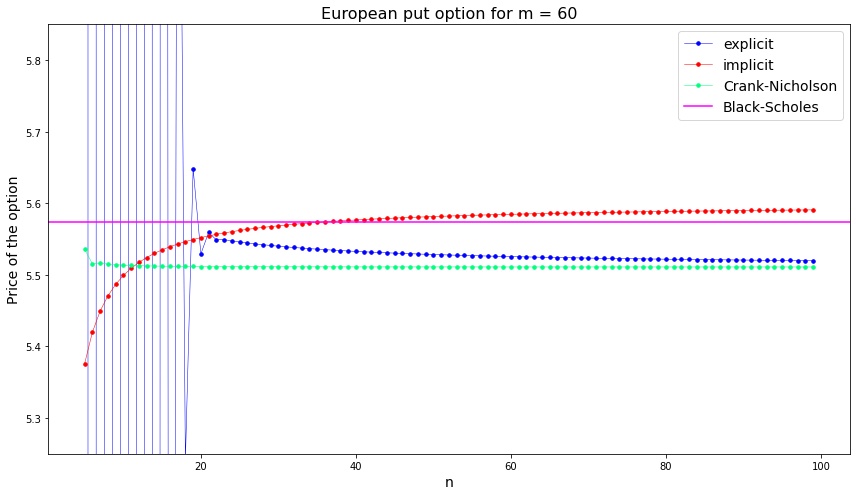

In [377]:
plt.figure(figsize=(12,7))
plt.plot(n_vals, put_option_value_m_60, label='explicit', marker='.', lw=0.5, markersize=7, color='blue')
plt.plot(n_vals, impl_put_m_60, label='implicit', marker='.', lw=0.5, markersize=7, color='red')
plt.plot(n_vals, cran_nich_m_60, label='Crank-Nicholson', marker='.', lw=0.5, markersize=7, color='springgreen')
plt.axhline(y=bs_put_price, color='fuchsia', linestyle='-', label='Black-Scholes')
plt.title('European put option for m = 60', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(5.25, 5.85)
plt.tight_layout()
plt.show()

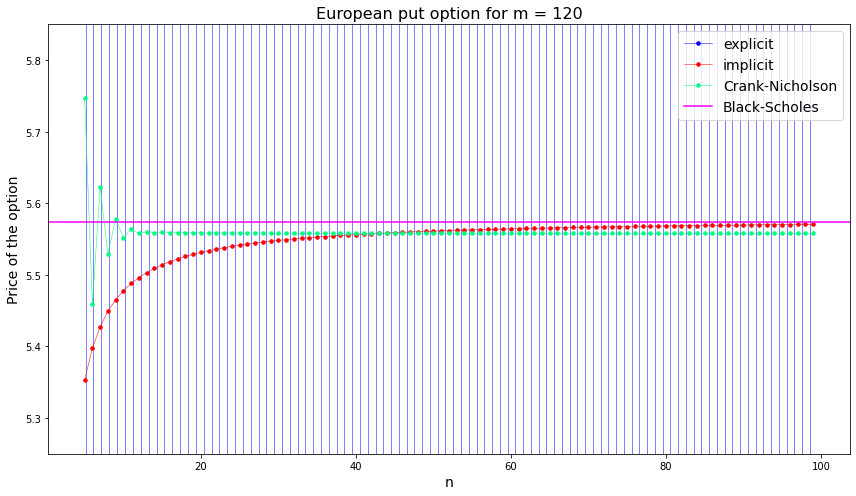

In [378]:
plt.figure(figsize=(12,7))
plt.plot(n_vals, put_option_value_m_120, label='explicit', marker='.', lw=0.5, markersize=7, color='blue')
plt.plot(n_vals, impl_put_m_120, label='implicit', marker='.', lw=0.5, markersize=7, color='red')
plt.plot(n_vals, cran_nich_m_120, label='Crank-Nicholson', marker='.', lw=0.5, markersize=7, color='springgreen')
plt.axhline(y=bs_put_price, color='fuchsia', linestyle='-', label='Black-Scholes')
plt.title('European put option for m = 120', fontsize=16)
plt.ylabel('Price of the option', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(5.25, 5.85)
plt.tight_layout()
plt.show()